# Ecuación de movimiento del péndulo simple

Un péndulo simple consiste de un cuerpo de masa m atado al extremo de una cuerda inextensible de masa despreciable fija en el otro extremo oscilando en un plano.

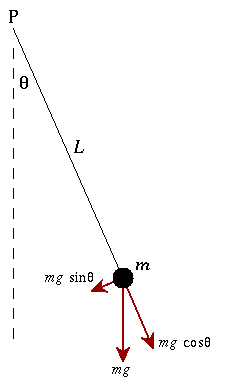

La ecuación de movimiento es (en el caso en que $\theta$ es pequeño):

$$ \frac{d^2\theta}{dt^2} + \frac{g}{L}\theta = 0, $$

y su solución es:

$$ \theta(t) = \theta_0\cos(\omega t).$$

### 1.- Escribe un código simple en python, para resolver la ecuación de movimiento de un péndulo simple utilizando la sintaxis básica, i.e cómo si fuera C/fortran.    

Método numérico para resolver la ED.
RK, Euler

El primer inciso del problema es escribir un código en python para resolver la ecuación de movimiento pero sin usar métodos vectoriales (numpy). Usaré el método numérico de Euler que se puede resumir como:

$$ y_{n+1} = y_{n} + mh\ ,$$
    
donde $m$ es la pendiente estimada y $h$ es el tamaño del paso en cada iteración. Primero tenemos que re-escribir la ecuación de movimiento como un sistema de ecuaciones:

$$ \phi = \frac{d\theta}{dt} $$

$$ \frac{d\phi}{dt}+ \frac{g}{l}\theta $$  

In [1]:
# Parameters definitions.
from math import pi, sqrt, cos

g = 9.8 # g = acceleration due gravity force [m/s**2]
l = 0.3   # l = lenght of the rope [m]
a = g/l
omega = sqrt(a) # omega = angular frequency [rad/s]
periods = 4
T = 2*pi/omega # T = period [1/s]

In [2]:
# Euler's numerical method implementation.
import eulerMethod

steps = 10000 # Number of iterations.
theta_0 = 8.73e-2 # initial displacement = [rads]
Dtheta_t0 = 0.1 # initial angular velocity = [rad/s], we choose it unequal to zero because otherwise can be problematic.
h = periods*T/steps # step size

eulerMethod.solveWithEuler('solution.csv',steps,h,a,Dtheta_t0,theta_0)

# finishing numerical method

Finalizada la implementación del método numérico ahora visualizaremos el resultado gráficamente. Usualmente en un programa de C se visualizaría usando un programa externo. Aquí lo visualizaré usando matplotlib y también pandas en la sección 3.

### 2.- Reescriendo el código anterior aprovechando el manejo de arreglos de numpy (vectorizar código). 

In [3]:
# contemporary approach to the problem
import numpy as np 
import eulerVectorized


t, theta = eulerVectorized.solveWithEulerVectorized(periods,T,steps,h,a,theta_0,Dtheta_t0)
theta_real = theta_0*np.cos(omega*t)

### 3.- Comparando resultados (usar tablas y gráficos) en terminos de los tiempos de ejecución. 

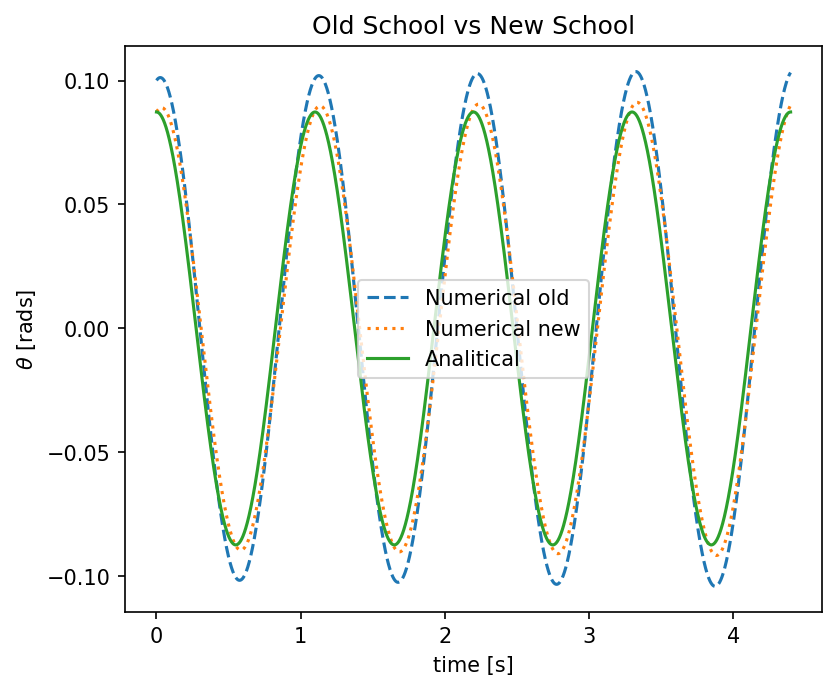

In [4]:
from matplotlib import pyplot as plt
from pandas import read_table

sol = read_table('solution.csv',sep=',')

t_vals = sol['time'].values
theta_vals = sol['theta'].values

sol_figure = plt.figure(figsize=[3*2,2.5*2],dpi=150)
plt.plot(t_vals,theta_vals,'--',label='Numerical old')
plt.plot(t,theta,':',label='Numerical new')
plt.plot(t,theta_real,label='Analitical')
plt.legend()
plt.ylabel("$\\theta$ [rads]")
plt.xlabel("time [s]")
plt.title("Old School vs New School")
sol_figure.savefig('figure1.png')